In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from bs4 import BeautifulSoup

In [14]:
import itertools
set(itertools.chain.from_iterable(df.plus_code))
# df.types.unique()

{'compound_code', 'global_code'}

In [21]:
col = 'permanently_closed'
df[col].unique()

array([nan,  1.])

In [6]:
df.columns

Index(['business_status', 'geometry', 'icon', 'name', 'opening_hours',
       'photos', 'place_id', 'plus_code', 'price_level', 'rating', 'reference',
       'scope', 'types', 'user_ratings_total', 'vicinity',
       'permanently_closed', 'CBG', 'Radius'],
      dtype='object')

In [23]:
df.geometry[0]

{'location': {'lat': 38.9002854, 'lng': -77.0445269},
 'viewport': {'northeast': {'lat': 38.9017771303, 'lng': -77.0431645697},
  'southwest': {'lat': 38.8990791697, 'lng': -77.0458625303}}}

In [19]:
df.isna().sum()

business_status        0
geometry               0
icon                   0
name                   0
opening_hours         11
photos                 0
place_id               0
plus_code              0
price_level            2
rating                 0
reference              0
scope                  0
types                  0
user_ratings_total     0
vicinity               0
permanently_closed    52
CBG                    0
Radius                 0
dtype: int64

In [12]:
df = pd.read_json('./data/outputs/cbg_restaurants/110010107001_radius-451m.json')
# df = df[df.business_status == 'OPERATIONAL']
df['name'].value_counts()

Subway                                    4
McDonald's                                2
Chipotle Mexican Grill                    2
Taylor Gourmet                            2
KAZ Sushi Bistro                          1
The Lucky Bar                             1
Sushi Express                             1
Baja Grille                               1
Mari Vanna DC                             1
Edgar Bar & Kitchen                       1
Mai Thai                                  1
Sichuan Pavilion                          1
Bravo Bravo                               1
Roti                                      1
The Bombay Club                           1
Greek Deli & Catering                     1
Crepeaway                                 1
Julia's Empanadas                         1
West Wing Cafe                            1
Corner Bakery                             1
El Chalan                                 1
Equinox Restaurant                        1
Nooshi                          

In [10]:
from selenium import webdriver
path = "./config/webdrivers/chromedriver.exe"
driver = webdriver.Chrome(path)
url = 'https://www.google.com/search?q=Le Cheval, Clay Street, Oakland'
driver.get(url)

response = BeautifulSoup(driver.page_source, 'html.parser')


[]

In [23]:
for res in response.find_all('a', href=True):
    if 'maps.google' in res['href']:
        print(res['href'])

https://maps.google.com/maps?q=Le+Cheval,+Clay+Street,+Oakland&um=1&ie=UTF-8&sa=X&ved=2ahUKEwit9OWVv6LvAhXtnuAKHezkA7MQ_AUoA3oECAkQBQ


[<a href="/search?q=Le+Cheval,+Clay+Street,+Oakland&amp;gbv=1&amp;sei=oQlHYO2fMu29ggfsyY-YCw">here</a>,
 <a class="gyPpGe" href="https://support.google.com/websearch/answer/181196?hl=en" jsname="KI37ad" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://support.google.com/websearch/answer/181196%3Fhl%3Den&amp;ved=0ahUKEwit9OWVv6LvAhXtnuAKHezkA7MQwcMDCAY">Accessibility help</a>,
 <a aria-expanded="false" aria-label="Google apps" class="gb_D" href="https://www.google.com/intl/en/about/products?tab=wh" role="button" tabindex="0"><svg class="gb_We" focusable="false" viewbox="0 0 24 24"><path d="M6,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM16,6c0,1.1 0.9,2 2,2s2,-0.9 2,-2 -0.9,-2 -2,-2 -2,0.9 -2,2zM12,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,
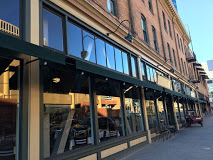
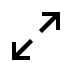
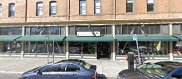
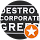
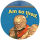
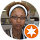
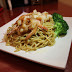
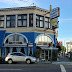
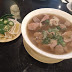
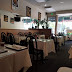
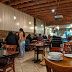

In [17]:
response.find_all('a', href=True)

In [16]:
for url in response.find_all('a', href=True):
    if 'maps' in url:
        print(url)

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>"Le Cheval, Clay Street, Oakland" - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.GTg18L1Wqko.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_RJSdiavtoJQlz9JCcpOM9qnUIlw/cb=gapi.loaded_0" nonce="zSw8HfrObn9Lsesx3FiKGw==" async=""></script><script nonce="zSw8HfrObn9Lsesx3FiKGw==">(function(){window.google={kEI:\'0ghHYKrVJrqx5NoPyfOZ8AM\',kEXPI:\'31\',kBL:\'4Bw4\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nva
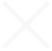
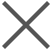
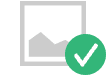
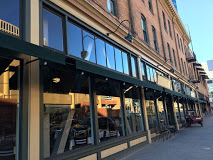
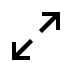
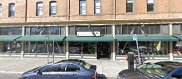
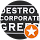
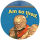
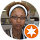
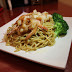
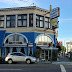
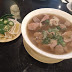
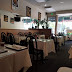
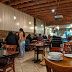
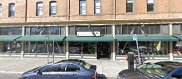
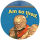
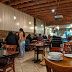
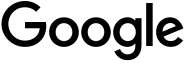

In [8]:
x = driver.get(url)
driver.page_source